                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  


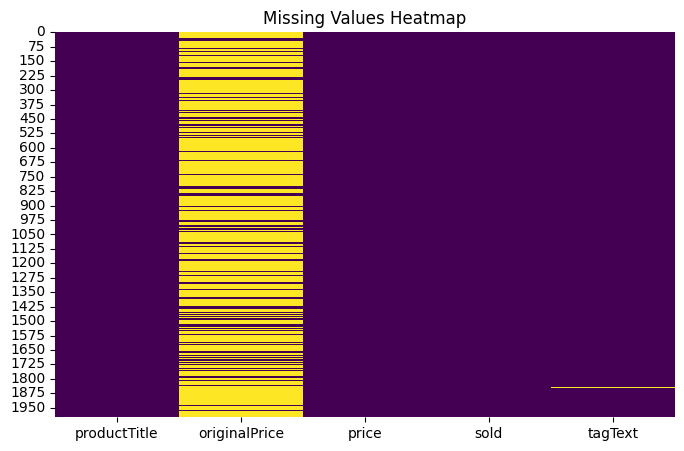

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("ecommerce_furniture_dataset_2024.csv")

# Show first few rows (for understanding)
print(df.head())

# Show data types & missing values (visualized as heatmap)
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [2]:
import pandas as pd

df = pd.read_csv("ecommerce_furniture_dataset_2024.csv")
print(df.head())

                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  


In [3]:
import numpy as np

for col in ['price','originalPrice']:
    df[col] = df[col].astype(str).str.replace(r'[\$]', '', regex=True).str.replace(',', '', regex=False).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['tagText'] = df['tagText'].fillna("Unknown")
df.drop_duplicates(inplace=True)

df['revenue'] = df['price'] * df['sold']
df['discount'] = df['originalPrice'] - df['price']

df.head()

,productTitle,originalPrice,price,sold,tagText,revenue,discount
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,46.79,600,Free shipping,28074.00,NaN
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,169.72,0,Free shipping,0.00,NaN
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,276.22,38.94
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,111.99,0,Free shipping,0.00,NaN
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,21.37,27.45


In [4]:
import sqlite3

# Create database
conn = sqlite3.connect("furniture.db")

# Save DataFrame as SQL table
df.to_sql("furniture", conn, if_exists="replace", index=False)
print("✅ Data saved into SQLite database")

✅ Data saved into SQLite database


In [5]:
# Example 1: Top 5 selling products
query1 = """
SELECT productTitle, SUM(sold) as total_sold
FROM furniture
GROUP BY productTitle
ORDER BY total_sold DESC
LIMIT 5;
"""
print(pd.read_sql(query1, conn))

# Example 2: Top 5 revenue products
query2 = """
SELECT productTitle, SUM(price * sold) as total_revenue
FROM furniture
GROUP BY productTitle
ORDER BY total_revenue DESC
LIMIT 5;
"""
print(pd.read_sql(query2, conn))

# Example 3: Average discount
query3 = """
SELECT AVG(originalPrice - price) as avg_discount
FROM furniture
WHERE originalPrice IS NOT NULL;
"""
print(pd.read_sql(query3, conn))

                                        productTitle  total_sold
0  Portable round Folding Chair Accordion Chair H...       10000
1  MUMUCC Multifunctional Foldable And Adjustable...        6000
2  Stylish Shoe Rack Metal Simple Shoe Shelf Foot...        2000
3  Portability Foot Rest Under Desk Footrest Ergo...        1900
4  Office Furniture Computer Stand 42*26cm Adjust...        1000
                                        productTitle  total_revenue
0  MUMUCC Multifunctional Foldable And Adjustable...      144150.00
1  Portable round Folding Chair Accordion Chair H...      122800.00
2  Caterpillar Single Sofa Lazy Couch Tatami Livi...      101288.75
3  Monitor Stand for 13-32 inches Screens, Dual M...       60012.00
4  Electric Stand Up Desk Workstation Whole-Piece...       54055.80
   avg_discount
0    131.187766


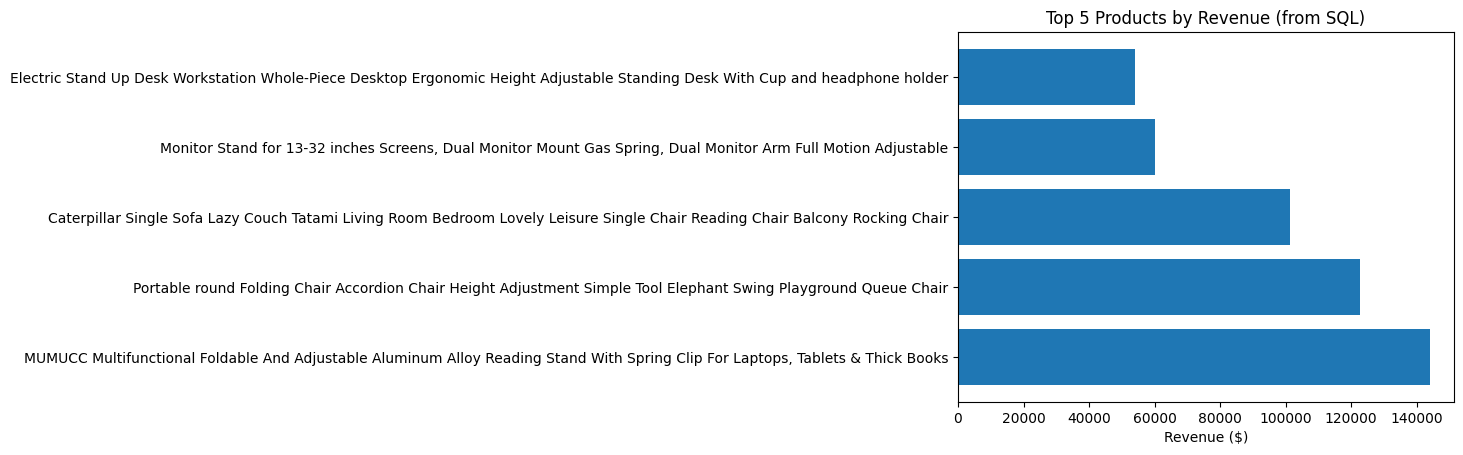

In [6]:
import matplotlib.pyplot as plt

# Run SQL and get DataFrame
top_revenue_df = pd.read_sql(query2, conn)

# Plot
plt.barh(top_revenue_df['productTitle'], top_revenue_df['total_revenue'])
plt.xlabel("Revenue ($)")
plt.title("Top 5 Products by Revenue (from SQL)")
plt.show()

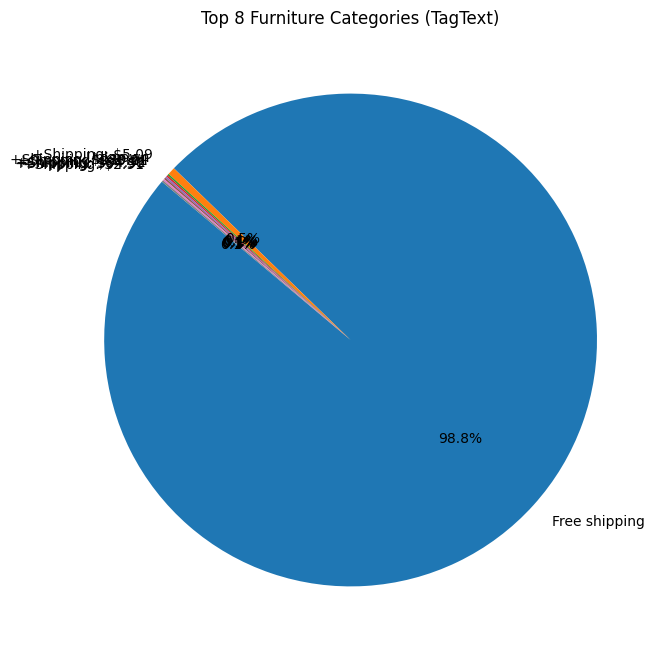

In [7]:
import matplotlib.pyplot as plt

# Count top categories (tagText)
tag_counts = df['tagText'].value_counts().head(8)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(tag_counts.values, labels=tag_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 8 Furniture Categories (TagText)")
plt.show()

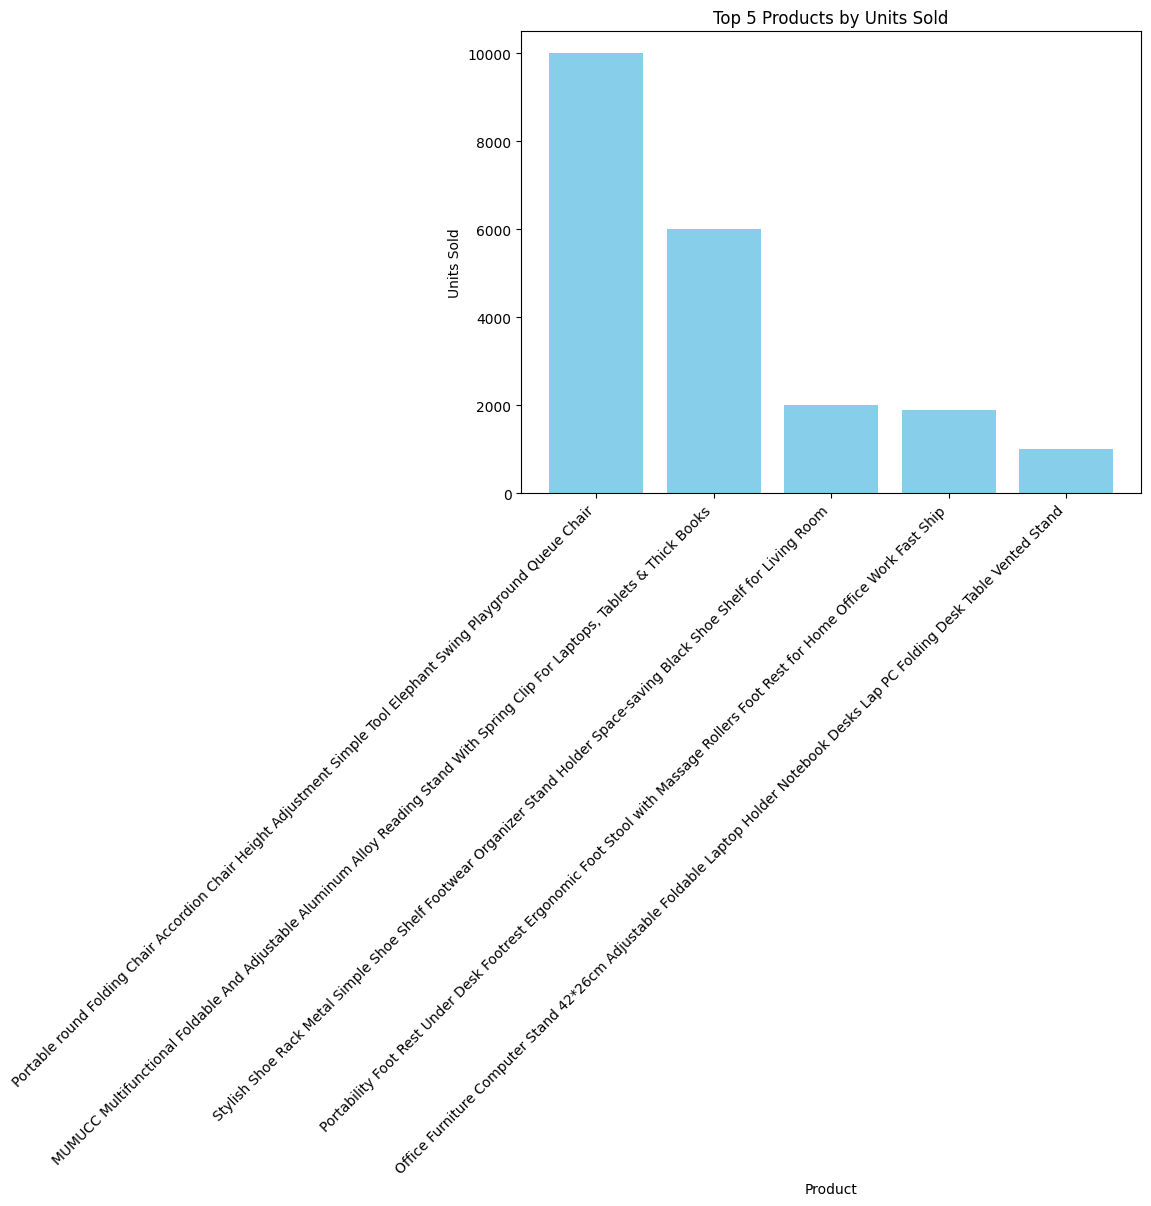

In [8]:
query = """
SELECT productTitle, SUM(sold) as total_sold
FROM furniture
GROUP BY productTitle
ORDER BY total_sold DESC
LIMIT 5;
"""
top5_sold = pd.read_sql(query, conn)

# Bar graph
plt.figure(figsize=(8,6))
plt.bar(top5_sold['productTitle'], top5_sold['total_sold'], color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.title("Top 5 Products by Units Sold")
plt.show()
